In [6]:
%matplotlib inline
import pandas as pd
# Schema: https://rstudio-pubs-static.s3.amazonaws.com/338127_f85723bf6d9b4637a4c5e1ff8f838432.html

df = pd.read_csv("data/season-1819.csv")
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [7]:
df.shape
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [8]:
# Remove all betting and predictions columns
noPredictionColumns = df.drop(df.iloc[:,23:], axis=1)

In [9]:
noPredictionColumns.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [10]:
unitedFixtures = noPredictionColumns[(noPredictionColumns.HomeTeam == "Man United") | (noPredictionColumns.AwayTeam == "Man United")]

In [11]:
unitedFixtures.shape

(38, 23)

In [12]:
homeFixtures = unitedFixtures[unitedFixtures.HomeTeam == "Man United"]
awayFixtures = unitedFixtures[unitedFixtures.AwayTeam == "Man United"]

In [13]:
homeGoals = sum(homeFixtures['FTHG'])
awayGoals = sum(awayFixtures['FTAG'])
print("Total goals: ", homeGoals + awayGoals)

Total goals:  65


In [14]:
homeResults = homeFixtures['FTR'].value_counts().rename({"H": "Win", "D": "Draw", "A": "Lose"})
homeResults

Win     10
Draw     6
Lose     3
Name: FTR, dtype: int64

In [15]:
awayResults = awayFixtures['FTR'].value_counts().rename({"H": "Lose", "D": "Draw", "A": "Win"})

In [16]:
totalWins = homeResults['Win'] + awayResults['Win']
totalDraws = homeResults['Draw'] + awayResults['Draw']
totalLose = homeResults['Lose'] + awayResults['Lose']

resultDf = pd.DataFrame([totalWins, totalDraws, totalLose], index=["win", "draw", "lose"], columns=['total'])
resultDf


,total
win,19
draw,9
lose,10


array([<Axes: ylabel='total'>], dtype=object)

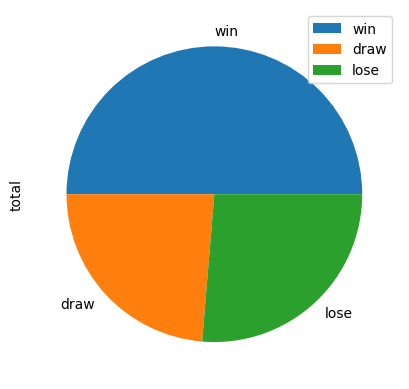

In [17]:
resultDf.plot(kind="pie", subplots=True)

In [25]:
# Total goals against
goalsAgainst = sum(homeFixtures['FTAG']) + sum(awayFixtures['FTHG'])
print("Total goals against: ", goalsAgainst)
# Average goals against per game
averageGoalsAgainst = (homeFixtures['FTAG'].mean(axis=0)+awayFixtures['FTHG'].mean(axis=0))/2
print("Average goals against per game: ", averageGoalsAgainst)

Total goals against:  54
Average goals against per game:  1.4210526315789473


In [40]:
# Total goals for
goalsScored = sum(homeFixtures['FTHG']) + sum(awayFixtures['FTAG'])
print("Total goals scored: ", goalsScored)
# Average goals scored per game
averageGoalsScored = (homeFixtures['FTHG'].mean(axis=0)+awayFixtures['FTAG'].mean(axis=0))/2
print("Average goals scored per Home game: ", homeFixtures['FTHG'].mean(axis=0))
print("Average goals scored per Away game: ", awayFixtures['FTAG'].mean(axis=0))
print("Average goals scored per game: ", averageGoalsScored)

Total goals scored:  65
Average goals scored per Home game:  1.736842105263158
Average goals scored per Away game:  1.6842105263157894
Average goals scored per game:  1.7105263157894737


In [39]:
# Most goals scored in a game
mostGoalsHomeIndex = homeFixtures['FTHG'].idxmax()
mostGoalsAwayIndex = awayFixtures['FTAG'].idxmax()
print(f"Most goals scored in an away fixture was {awayFixtures.loc[mostGoalsAwayIndex]['FTAG']} against {awayFixtures.loc[mostGoalsAwayIndex]['HomeTeam']} on {awayFixtures.loc[mostGoalsAwayIndex]['Date']}")
print(f"Most goals scored in a home fixture was {homeFixtures.loc[mostGoalsHomeIndex]['FTHG']} against {homeFixtures.loc[mostGoalsHomeIndex]['AwayTeam']} on {homeFixtures.loc[mostGoalsHomeIndex]['Date']}")

Most goals scored in an away fixture was 5 against Cardiff on 22/12/2018
Most goals scored in a home fixture was 4 against Fulham on 08/12/2018
